In [22]:
import sys
sys.path.append('../')
from Driver import Driver
from Race import Race
from TMEasy import Tire
from Vehicle import Vehicle
from Track import Track
import numpy as np

In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Tires

Vertical force considered: 3500N
Camber slip = 0.00
Bore slip = 0.00


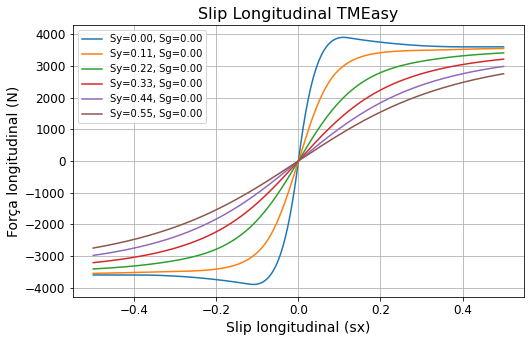

Coenering stiffness = 1186.9N/৹


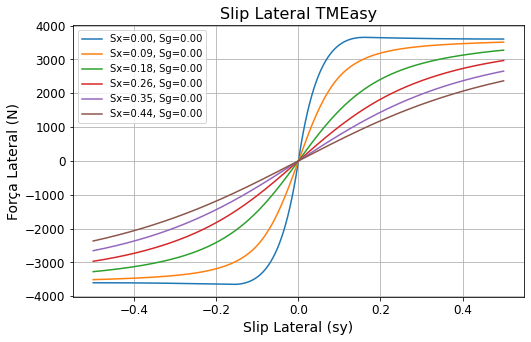

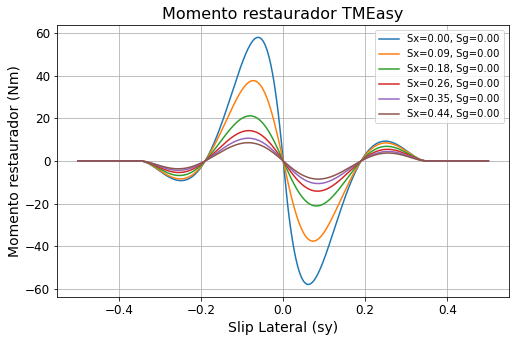

In [24]:
radius = 0.293
mass = 12
Jz_tire = 1
cz = 190000
dfx0 = 100000
dfy0 = 80000
fxm = 3900
fym = 3650
sxm = 0.11
sym = 0.16
fxs = 3600
fys = 3600
sxs = 0.4
sys = 0.5
n2L0 = 0.18
sy0 = 0.19
syE = 0.35
lamb = 2/3
frr = 0.015
TMEasy = Tire(radius, mass, Jz_tire, cz, dfx0, dfy0, fxm, fym, sxm, sym, fxs, fys, sxs, sys, sy0, syE, lamb, n2L0, frr)
TMEasy.all_info()

## Driver

In [25]:
driver = Driver(accelerator='PID', steering='steering1')

steering defined.


## Track

In [26]:
hx = 0
hy = 0
wx = 0.1
wy = 100
# mean = 0
# variance = 1

zf = lambda x, y: hx * np.sin(wx * x) + hy * np.sin(wy * y) #+ 0.01 * np.sin(10*x)
vzf = lambda x, vx, y, vy: hx * wx * vx * np.cos(wx * x) + hy * wy * vy * np.cos(wy * y)

track = Track(zf, vzf)
# track.set_noise(mean, variance)
track.profile(x=[0, 1000], y=[0,100], resolution=1)

## Vehicle + Suspension

In [27]:
vehicle_mass = 1742
Ixx = 540
Iyy = 2398
Izz = 2617
lf = 1.07
lr = 1.605
wf = 1.517
wr = 1.505
af = 2.17
cd = 0.3
CG_height = 0.503
car = Vehicle(TMEasy, vehicle_mass, Ixx, Iyy, Izz, lf, lr, wf, wr, af, cd, CG_height)

In [28]:
K_sf = 30800
K_sr = 28900
C_sf = 4500
C_sr = 3500
car.set_suspension(K_sf, K_sr, C_sf, C_sr)

G = 84e9
df = 0.022
af = 0.25
bf = 0.9
car.set_anti_roll_bar('f', df, af, bf, G)

dr = 0.013
ar = 0.3
br = 0.8
car.set_anti_roll_bar('r', dr, ar, br, G)

gamma1 = np.deg2rad(0) # O ângulo de cambagem positivo joga o carro para a direita
gamma2 = np.deg2rad(0)
gamma3 = 0
gamma4 = 0
car.set_camber(gamma1, gamma2, gamma3, gamma4)

Anti-roll Bar (front) = 485.5 Nm/৹
Anti-roll Bar (rear)  = 36.5 Nm/৹


## Simulation

In [29]:
sim = Race(car, driver, track, maxTime=100, rtol=1e-3, atol=1e-3, maxStep=1e-2)
sim.post_process()

Solution Finished
steering defined.


## Position

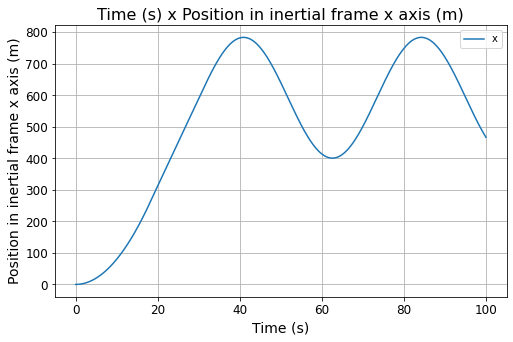

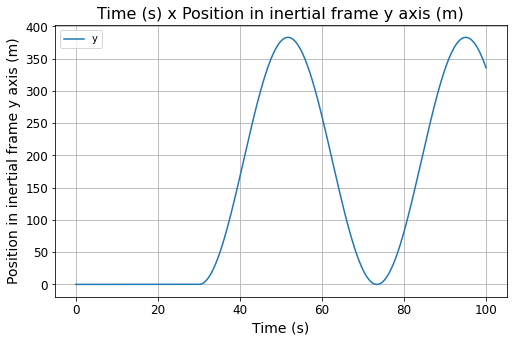

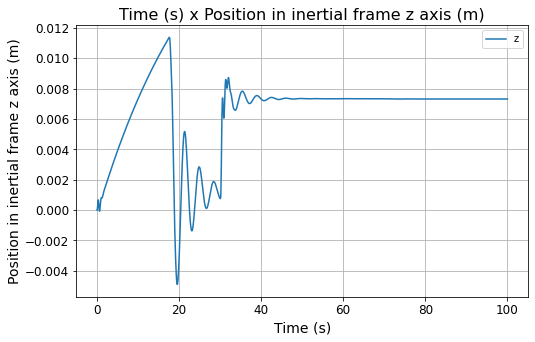

In [30]:
sim.x.plot2D()
sim.y.plot2D()
sim.z.plot2D()

## Speed

### Vehicle frame

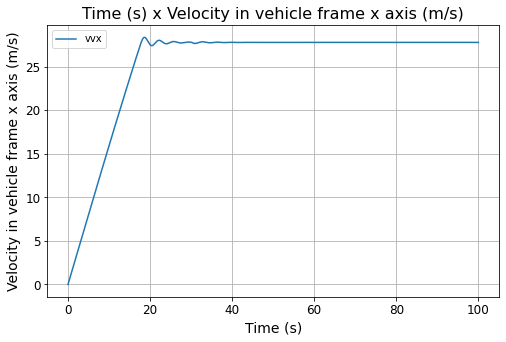

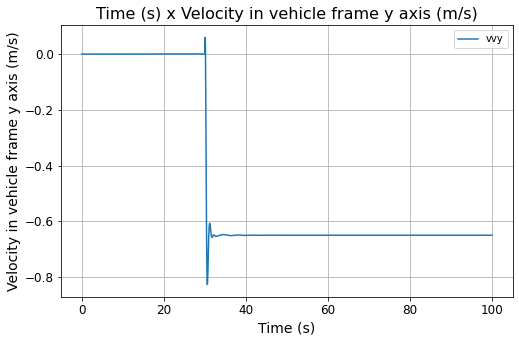

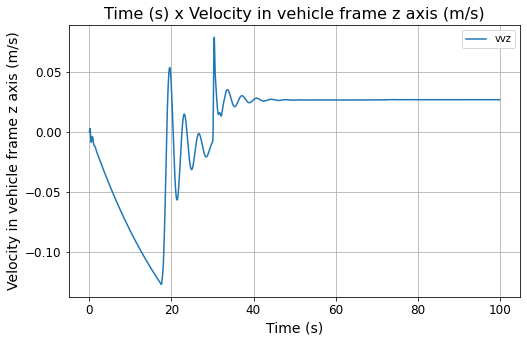

In [31]:
sim.vvx.plot2D()
sim.vvy.plot2D()
sim.vvz.plot2D()

### Inertial frame

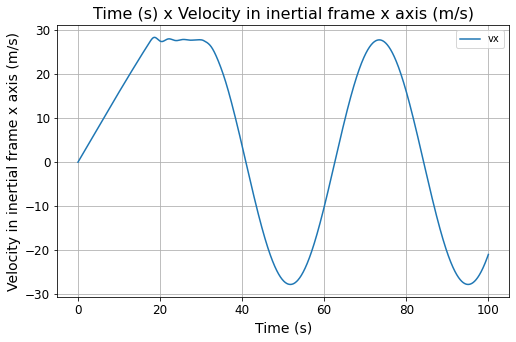

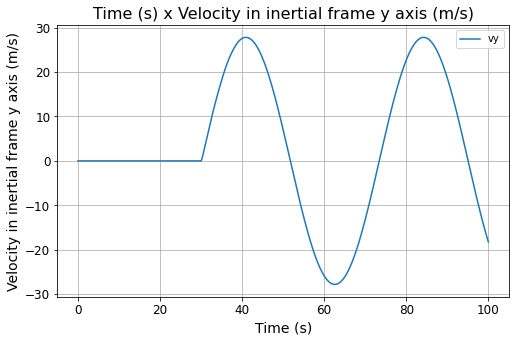

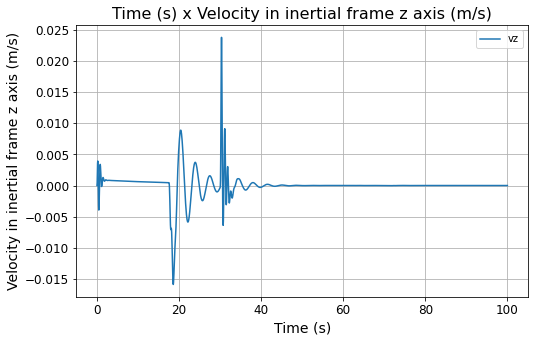

In [32]:
sim.vx.plot2D()
sim.vy.plot2D()
sim.vz.plot2D()

## Acceleration

### Input torque

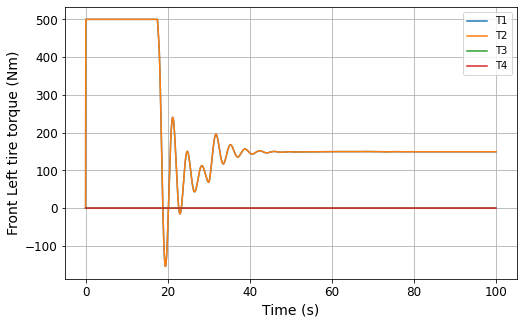

In [33]:
sim.T1.comparaNPlots([sim.T2, sim.T3, sim.T4])

### Vehicle Frame

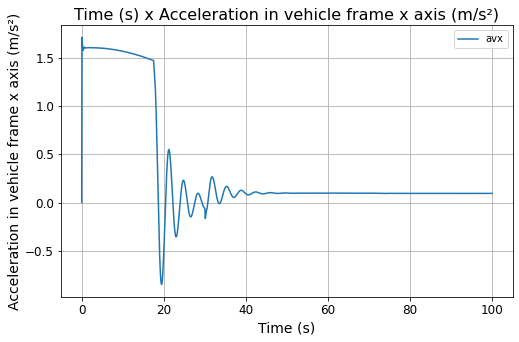

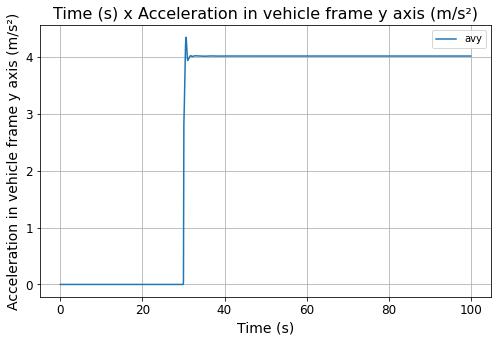

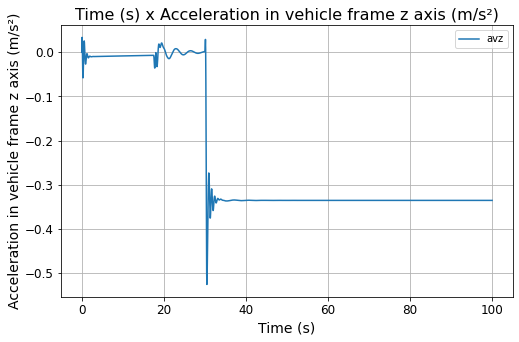

In [34]:
sim.avx.plot2D()
sim.avy.plot2D()
sim.avz.plot2D()

### Inertial Frame

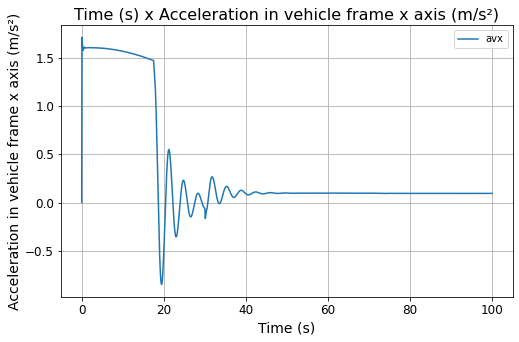

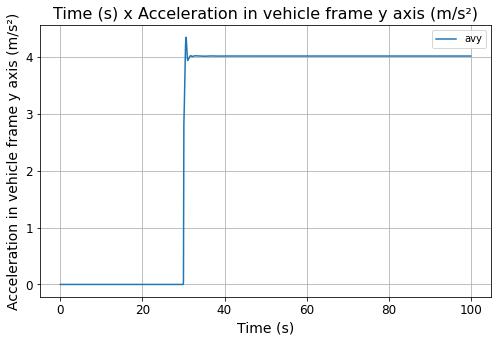

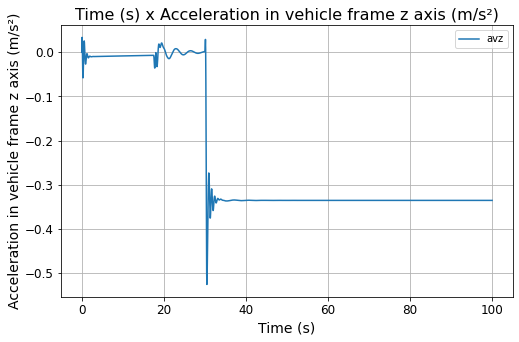

In [35]:
sim.avx.plot2D()
sim.avy.plot2D()
sim.avz.plot2D()

## Tires

### Delta


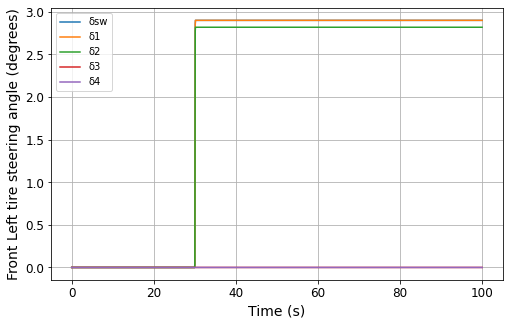

In [36]:
sim.delta_sw.comparaNPlots([sim.delta_1, sim.delta_2, sim.delta_3, sim.delta_4])

### Slips

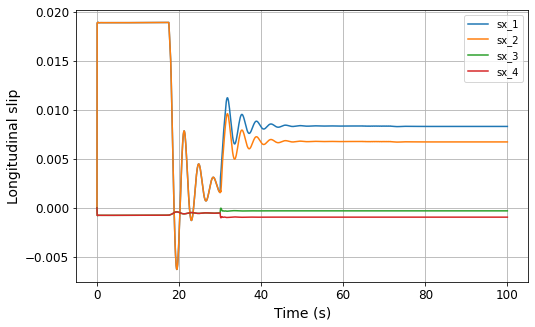

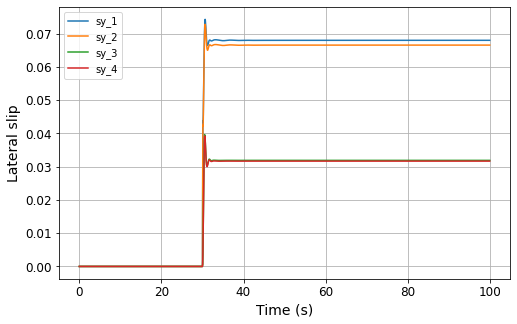

In [37]:
sim.sx_1.comparaNPlots([sim.sx_2, sim.sx_3, sim.sx_4])
sim.sy_1.comparaNPlots([sim.sy_2, sim.sy_3, sim.sy_4])

### Forces

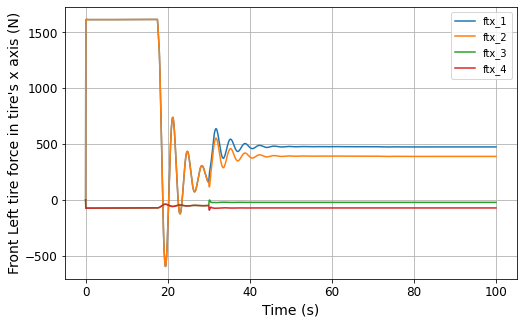

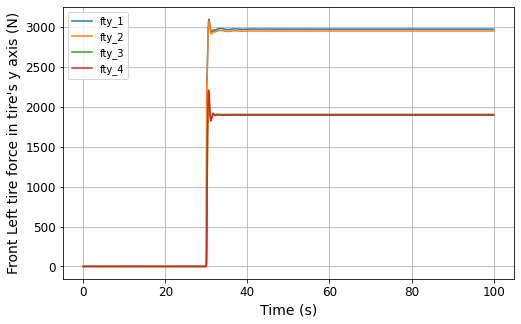

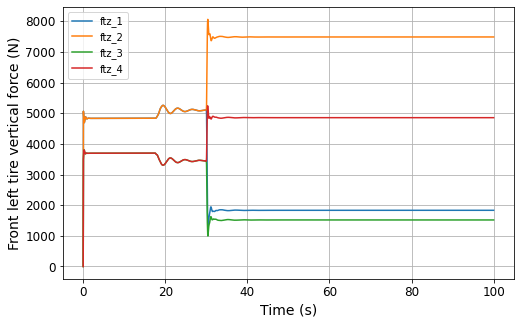

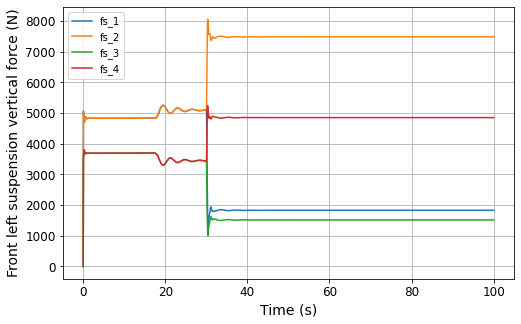

In [38]:
sim.ftx_1.comparaNPlots([sim.ftx_2, sim.ftx_3, sim.ftx_4])
sim.fty_1.comparaNPlots([sim.fty_2, sim.fty_3, sim.fty_4])
sim.ftz_1.comparaNPlots([sim.ftz_2, sim.ftz_3, sim.ftz_4])
sim.fs_1.comparaNPlots([sim.fs_2, sim.fs_3, sim.fs_4])

### Tire height (z position)

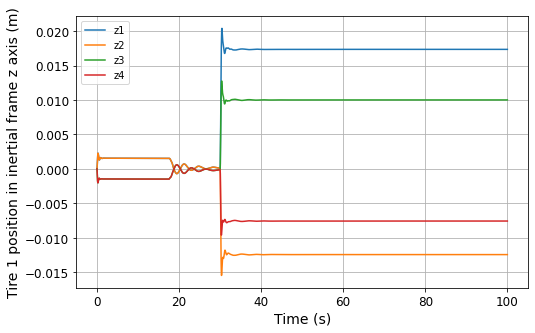

In [39]:
sim.z1.comparaNPlots([sim.z2, sim.z3, sim.z4])

## Angles

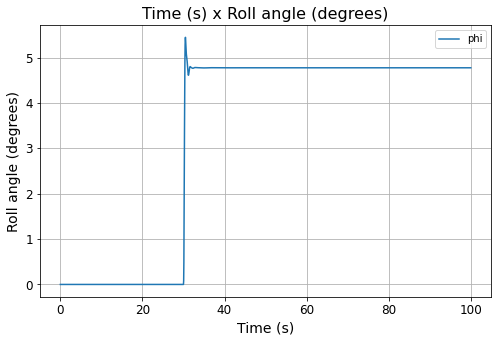

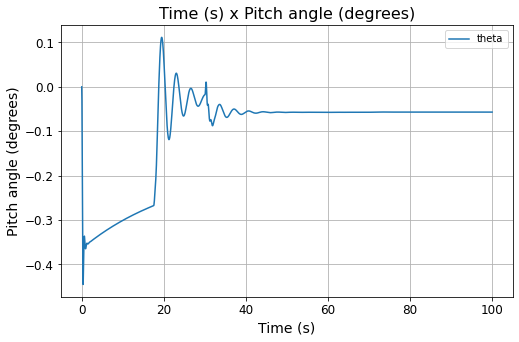

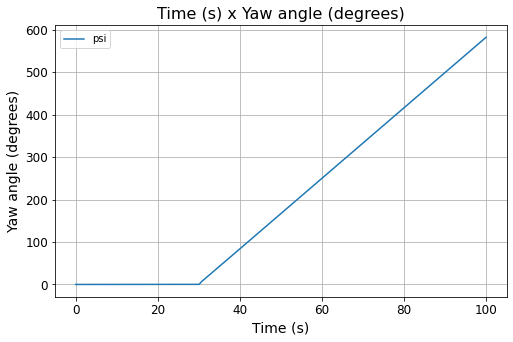

In [40]:
sim.phi.plot2D()
sim.theta.plot2D()
sim.psi.plot2D()

## Parametric

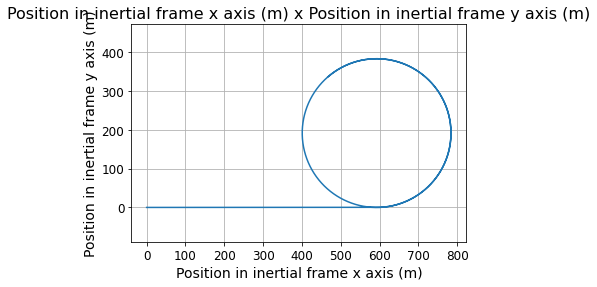

In [41]:
sim.xy.plotparametric()

## Animation

In [42]:
# sim.animate(500, save=False)